In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

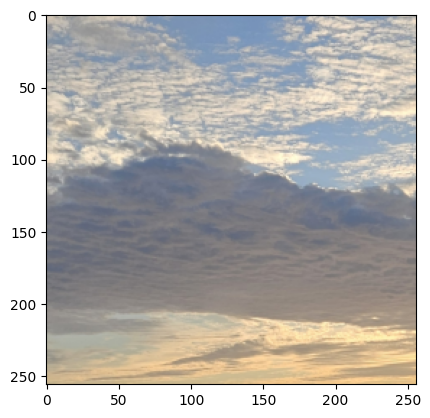

In [5]:
img = cv.imread('testclouds/8.jpg')
resizedImg = cv.resize(img, (256, 256), interpolation=cv.INTER_AREA)
plt.imshow(resizedImg[:,:,::-1])

In [9]:
def extract_clouds(image, k=2):
    height, width, _ = image.shape
    
    image_2d = image.reshape((-1, 3))
    _, labels, centers = cv.kmeans(image_2d.astype(np.float32), k, None,
                                    (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2),
                                    10, cv.KMEANS_RANDOM_CENTERS)
    
    segmented_image = labels.reshape((height, width))
    cloud_cluster = np.argmax([np.mean(image[segmented_image == i]) for i in range(k)])
    cloud_mask = (segmented_image == cloud_cluster).astype(np.uint8) * 255
    
    return image, cloud_mask

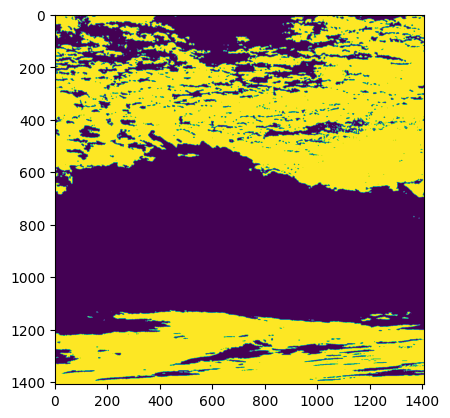

In [15]:
plt.imshow(extract_clouds(cv.imread('testclouds/8.jpg'))[1])

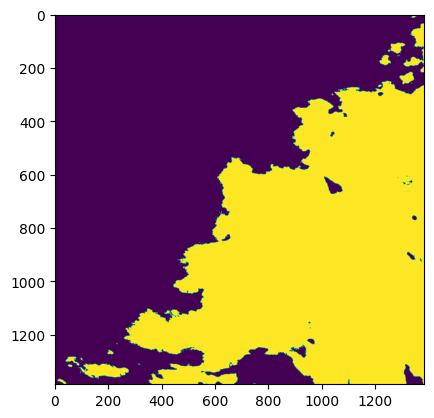

In [16]:
plt.imshow(extract_clouds(cv.imread('testclouds/9.jpg'))[1])

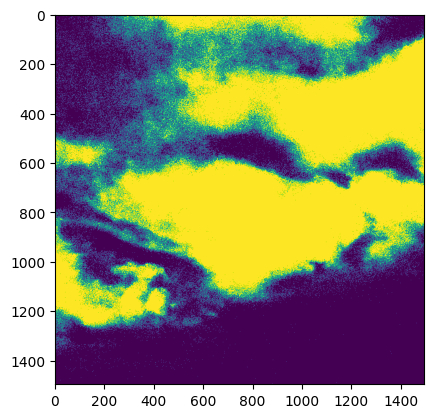

In [17]:
plt.imshow(extract_clouds(cv.imread('testclouds/1.jpg'))[1])

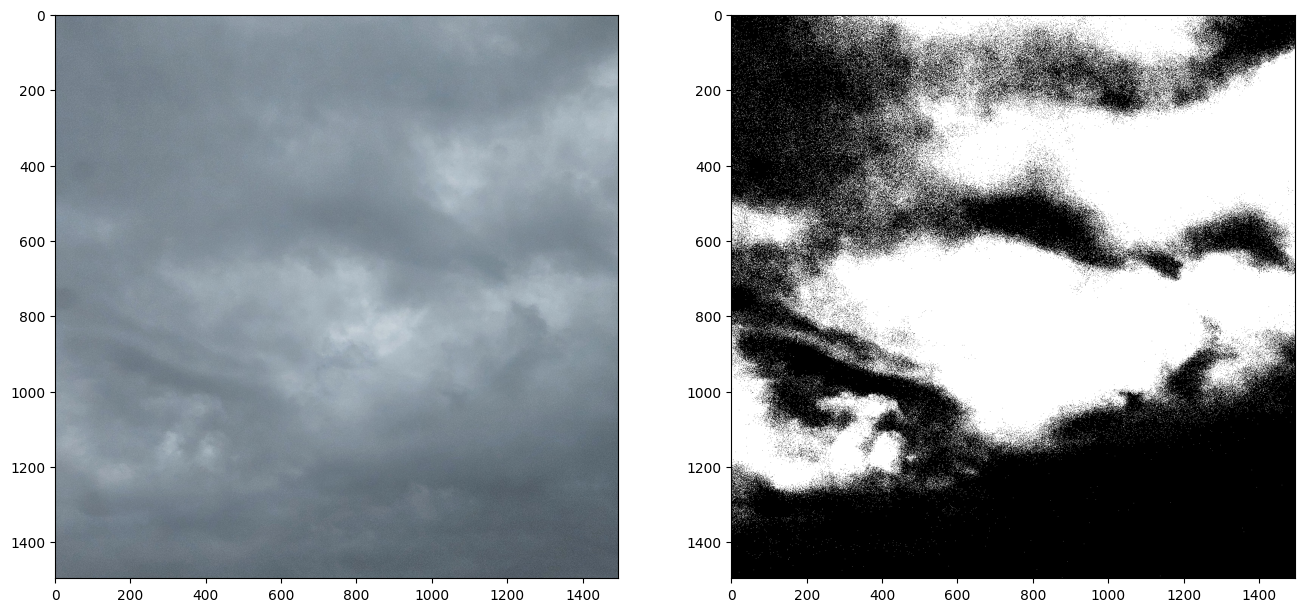

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 9))

tmp = cv.imread('testclouds/1.jpg')
ax[0].imshow(tmp[:,:,::-1])
ax[1].imshow(extract_clouds(tmp)[1], cmap='gray')

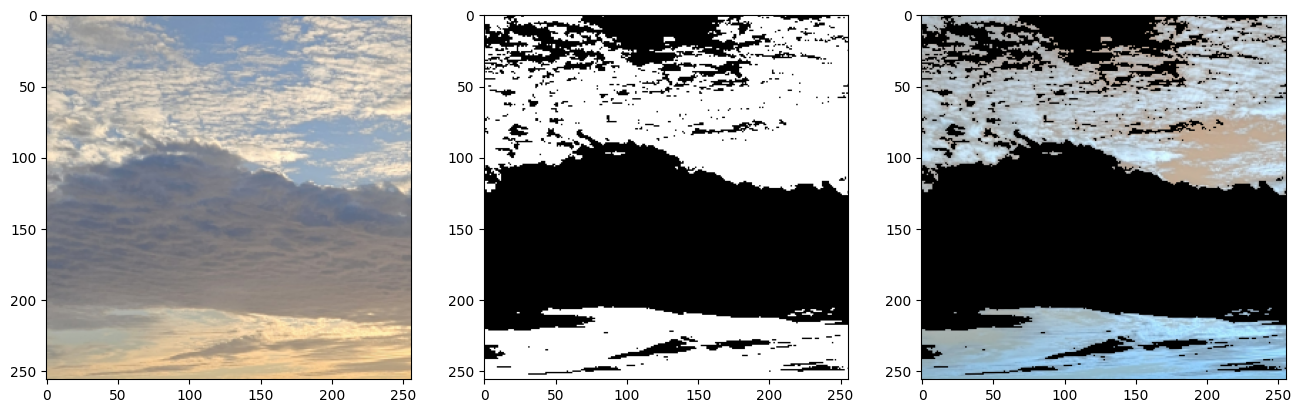

In [61]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 9))

tmp = cv.imread('testclouds/8.jpg')
tmp = cv.resize(tmp, (256, 256), interpolation=cv.INTER_AREA)
extracted = extract_clouds(tmp)[1]
ax[0].imshow(tmp[:,:,::-1])
ax[1].imshow(extracted, cmap='gray')
ax[2].imshow(cv.bitwise_and(tmp, cv.cvtColor(extracted, cv.COLOR_GRAY2RGB)))

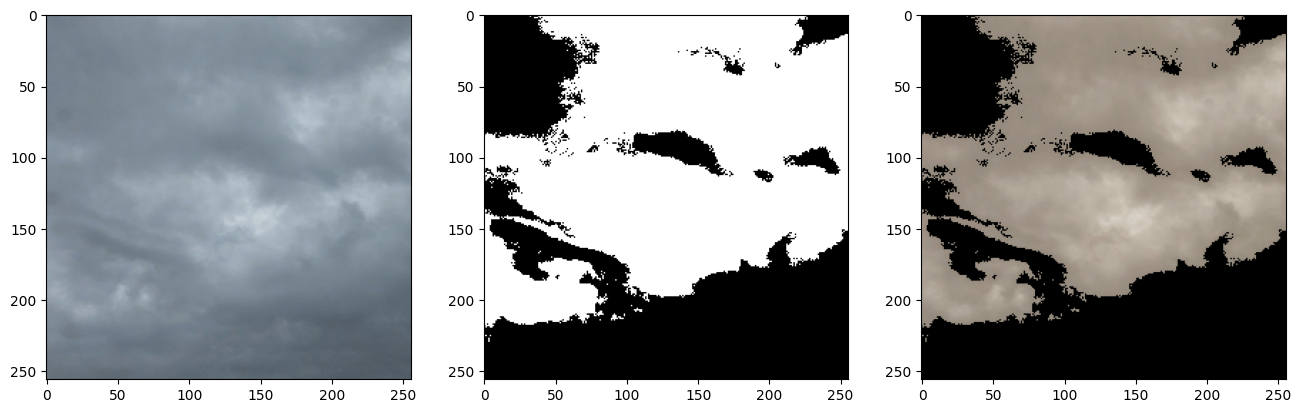

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 9))

tmp = cv.imread('testclouds/1.jpg')
tmp = cv.resize(tmp, (256, 256), interpolation=cv.INTER_AREA)
extracted = extract_clouds(tmp)[1]
ax[0].imshow(tmp[:,:,::-1])
ax[1].imshow(extracted, cmap='gray')
ax[2].imshow(cv.bitwise_and(tmp, cv.cvtColor(extracted, cv.COLOR_GRAY2RGB)))

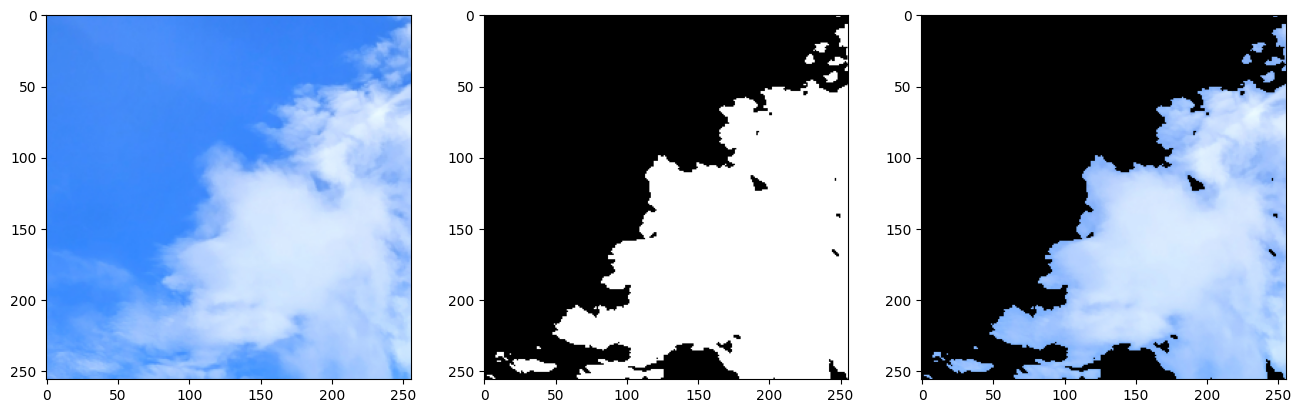

In [62]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 9))

tmp = cv.imread('testclouds/9.jpg')
tmp = cv.resize(tmp, (256, 256), interpolation=cv.INTER_AREA)
extracted = extract_clouds(tmp)[1]
ax[0].imshow(tmp[:,:,::-1])
ax[1].imshow(extracted, cmap='gray')
ax[2].imshow(cv.bitwise_and(tmp, cv.cvtColor(extracted, cv.COLOR_GRAY2RGB))[:,:,::-1])